In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

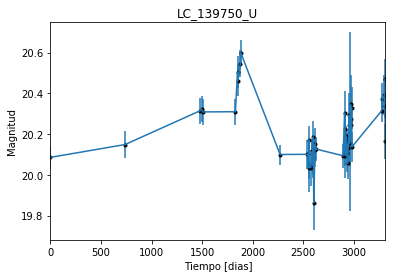

In [2]:
data = np.genfromtxt('LC_139750_U.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_139750_U')
plt.savefig("LC_139750_U.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [5]:
%%capture capt
sample = model.run_mcmc(20000)

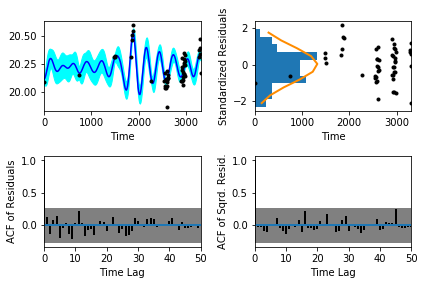

In [6]:
sample.assess_fit()

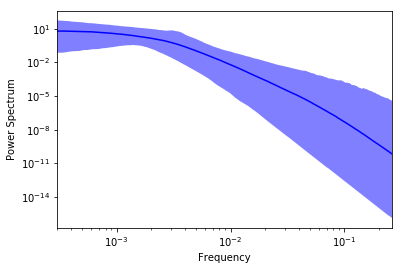

In [7]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [8]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

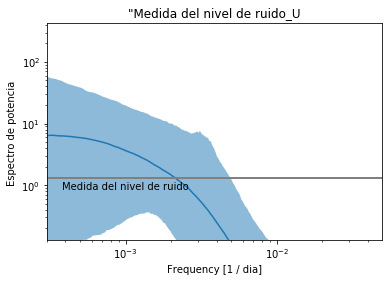

In [9]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_139750_U')
plt.title('"Medida del nivel de ruido_U')
plt.savefig("Medida del nivel de ruido_U.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_139750_U')

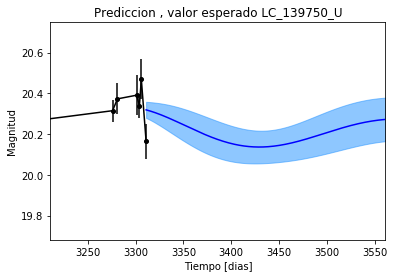

In [10]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_139750_U')

Text(0.5,1,'Prediccion, Caminos simulados  LC_139750_U')

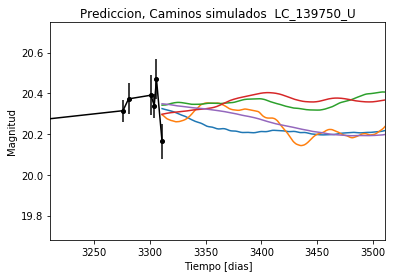

In [11]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_139750_U')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


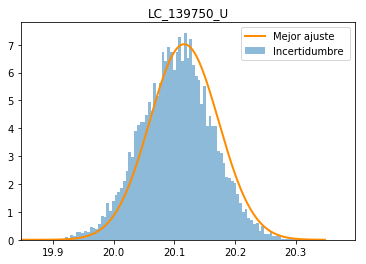

In [12]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_139750_U')
plt.savefig("Mejor_ajuste_LC_139750_U.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_139750_U')

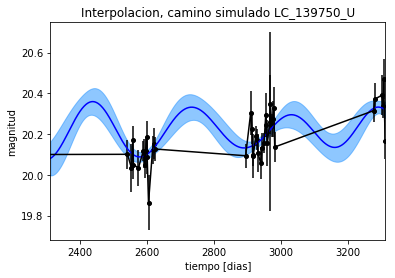

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_139750_U')

Text(0.5,1,'Interpolacion, camino simulado LC_139750_U')

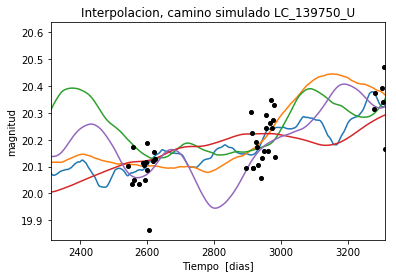

In [14]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_139750_U')

In [15]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [16]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 509.364774698
Median: 0.00330614923118
Standard deviation: 0.0868302195529
68% credibility interval: [ 0.00058022  0.05250588]
95% credibility interval: [  3.38097394e-04   3.56789107e-01]
99% credibility interval: [  3.08608870e-04   4.90286362e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 573.446555494
Median: 0.00140037203482
Standard deviation: 0.0394986687967
68% credibility interval: [ 0.00047462  0.01232004]
95% credibility interval: [ 0.00032744  0.11098235]
99% credibility interval: [ 0.00030826  0.29808829]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 794.044473226
Median: 0.011293539461
Standard deviation

In [17]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1636.5042655
Median: 71.6722330187
Standard deviation: 1.58376219469
68% credibility interval: [ 69.9120456   72.79086636]
95% credibility interval: [ 67.4349546   73.56000126]
99% credibility interval: [ 65.36944453  73.81584315]


In [18]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 942.711052268
Median: 0.290590871765
Standard deviation: 1.10406943431
68% credibility interval: [ 0.03912326  1.81252827]
95% credibility interval: [ 0.01274832  3.91815428]
99% credibility interval: [ 0.00985052  5.77448042]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 718.885983595
Median: 0.0604432454283
Standard deviation: 2.07022241397
68% credibility interval: [ 0.00274577  1.49301318]
95% credibility interval: [  3.77275039e-

In [19]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 3480.6758553
Median: 2.26583738074e-24
Standard deviation: 7.12460301259e+86
68% credibility interval: [  2.57536991e-73   3.44557922e+18]
95% credibility interval: [  5.71244333e-134   2.55117192e+059]
99% credibility interval: [  1.13949716e-162   2.97598672e+076]


In [20]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 3036.62206499
Median: 20.2199174928
Standard deviation: 0.0747039716822
68% credibility interval: [ 20.15974865  20.28001923]
95% credibility interval: [ 20.07474166  20.36689731]
99% credibility interval: [ 19.96775976  20.46199973]


In [21]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 603.351704062
Median: 0.00319315766853
Standard deviation: 0.108584587139
68% credibility interval: [ 0.          0.12172095]
95% credibility interval: [ 0.          0.41324173]
99% credibility interval: [ 0.          0.50083125]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 603.351704062
Median: 0.00319315766853
Standard deviation: 0.108584587139
68% credibility interval: [ 0.          0.12172095]
95% credibility interval: [ 0.          0.41324173]
99% credibility interval: [ 0.          0.50083125]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 564.068139691
Median: 0.0
Standard deviation: 0.00102345726459
68% c

In [22]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1636.5042655
Median: 71.6722330187
Standard deviation: 1.58376219469
68% credibility interval: [ 69.9120456   72.79086636]
95% credibility interval: [ 67.4349546   73.56000126]
99% credibility interval: [ 65.36944453  73.81584315]


In [23]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 3062.10324058
Median: 0.0251068232939
Standard deviation: 0.0334397092436
68% credibility interval: [ 0.01451141  0.0474813 ]
95% credibility interval: [ 0.00902205  0.10269343]
99% credibility interval: [ 0.00671029  0.20552614]


In [24]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 2302.1220145
Median: 0.917479121549
Standard deviation: 0.147811524494
68% credibility interval: [ 0.78610023  1.0771473 ]
95% credibility interval: [ 0.69335596  1.26415063]
99% credibility interval: [ 0.63652818  1.3978959 ]


In [25]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 870.741321851
Median: 1.46565917582e-05
Standard deviation: 0.0120977565119
68% credibility interval: [  8.72152382e-24   6.42550910e-04]
95% credibility interval: [  6.43638532e-64   9.13619308e-03]
99% credibility interval: [  3.62508178e-82   5.95276496e-02]


In [26]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 509.364774698
Median: (-0.0207731482727-0.413738122989j)
Standard deviation: 0.873568396876
68% credibility interval: [-0.32990415-0.27544574j -0.00364563-0.70572625j]
95% credibility interval: [ -2.24177208e+00+0.j          -2.12432858e-03-0.01447913j]
99% credibility interval: [ -3.08056006e+00+0.j          -1.93904672e-03-0.00140892j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 573.446555494
Median: (-0.00879879699379+0.0479497408397j)
Standard deviation: 0.725993647362
68% credibility interval: [-0.07740909+1.28038701j -0.00298211+0.02672085j]
95% credibility interval: [-0.69732267+1.28033685j -0.00205738+2.29704421j]
99% credibility interval: [-1.87294399+2.8279877j  -0.00193682+0.00781903j]
Posterior summary 